<a href="https://colab.research.google.com/github/smruti1571/Python/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mysql-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.9 MB/s eta 0:00:00


In [3]:
import mysql.connector

# Establish a connection to the MySQL database
conn = mysql.connector.connect(
 host= "mysqldatabase.cyahxnmblxms.us-east-2.rds.amazonaws.com",
user="admin",
password="Albedo$001",
database="JUICE"
)

if conn.is_connected():
    print("Connected to MySQL database")

Connected to MySQL database


In [4]:
cursor = conn.cursor()
query = "select d.startdatetime, t.TagName , t.machine_name from datalog as d join tagdetail as t on t.TagIndex = d.TagIndex where t.deletedAt is NULL and d.deletedAt is NULL and machine_name = 'J04' and TagName = 'BOTTLE_CASING';"

# Execute the query
cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

# Display the fetched rows
for row in rows:
    print(row)

(datetime.datetime(2023, 5, 12, 14, 22, 54), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 24, 55), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 25), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 25, 56), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 26, 1), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 26, 55), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 27), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 27, 56), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 28, 1), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 28, 55), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 29), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 29, 55), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 30), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 30, 56), 'BOTTLE_CASING', 'J04')
(datetime.datetime(2023, 5, 12, 14, 31, 1), 'BOTTLE_

In [5]:
import pandas as pd

# Convert the fetched rows into a DataFrame
df = pd.DataFrame(rows, columns=['startdatetime', 'TagName', 'machine_name'])

# Display DataFrame
print(df)


           startdatetime        TagName machine_name
0    2023-05-12 14:22:54  BOTTLE_CASING          J04
1    2023-05-12 14:24:55  BOTTLE_CASING          J04
2    2023-05-12 14:25:00  BOTTLE_CASING          J04
3    2023-05-12 14:25:56  BOTTLE_CASING          J04
4    2023-05-12 14:26:01  BOTTLE_CASING          J04
...                  ...            ...          ...
3304 2023-06-07 13:49:35  BOTTLE_CASING          J04
3305 2023-06-07 13:49:42  BOTTLE_CASING          J04
3306 2023-06-07 13:50:45  BOTTLE_CASING          J04
3307 2023-06-07 13:50:52  BOTTLE_CASING          J04
3308 2023-06-07 13:51:16  BOTTLE_CASING          J04

[3309 rows x 3 columns]


In [6]:
# Sort the DataFrame by startdatetime
df_sorted = df.sort_values(by='startdatetime')

# Calculate the difference in time in seconds of each row from its previous row
df_sorted['time_difference_seconds'] = df_sorted['startdatetime'].diff().dt.total_seconds()

# Display the sorted DataFrame with time differences
print(df_sorted)


           startdatetime        TagName machine_name  time_difference_seconds
0    2023-05-12 14:22:54  BOTTLE_CASING          J04                      NaN
1    2023-05-12 14:24:55  BOTTLE_CASING          J04                    121.0
2    2023-05-12 14:25:00  BOTTLE_CASING          J04                      5.0
3    2023-05-12 14:25:56  BOTTLE_CASING          J04                     56.0
4    2023-05-12 14:26:01  BOTTLE_CASING          J04                      5.0
...                  ...            ...          ...                      ...
3304 2023-06-07 13:49:35  BOTTLE_CASING          J04                     62.0
3305 2023-06-07 13:49:42  BOTTLE_CASING          J04                      7.0
3306 2023-06-07 13:50:45  BOTTLE_CASING          J04                     63.0
3307 2023-06-07 13:50:52  BOTTLE_CASING          J04                      7.0
3308 2023-06-07 13:51:16  BOTTLE_CASING          J04                     24.0

[3309 rows x 4 columns]


In [7]:
# Calculate the mean of the time_difference_seconds column
mean_time_difference = df_sorted['time_difference_seconds'].mean()

# Calculate the standard deviation of the time_difference_seconds column
std_time_difference = df_sorted['time_difference_seconds'].std()

# Display the mean and standard deviation
print("Mean of time_difference_seconds:", mean_time_difference)
print("Standard deviation of time_difference_seconds:", std_time_difference)


Mean of time_difference_seconds: 678.5072551390568
Standard deviation of time_difference_seconds: 12268.606039212294


In [18]:
import pandas as pd


# Define quadrants based on deviation from the mean
quadrants = pd.cut(df_sorted['time_difference_seconds'],
                   bins=[-float('inf'), mean_time_difference - std_time_difference,
                         mean_time_difference, mean_time_difference + std_time_difference,
                         float('inf')],
                   labels=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])

# Count occurrences of each quadrant
quadrant_counts = quadrants.value_counts()

# Display the distribution of data in different quadrants
print("Distribution of data in different quadrants:")
print(quadrant_counts)


Distribution of data in different quadrants:
time_difference_seconds
Quadrant 2    3277
Quadrant 4      19
Quadrant 3      12
Quadrant 1       0
Name: count, dtype: int64


In [9]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform it
df_imputed = pd.DataFrame(imputer.fit_transform(df_sorted[['time_difference_seconds']]), columns=['time_difference_seconds'])

# Now, the 'df_imputed' DataFrame contains no missing values


In [10]:
from sklearn.ensemble import IsolationForest

# Define the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your data

# Fit the model to your data (assuming 'df_imputed' is your DataFrame)
model.fit(df_imputed)

# Predict outliers/anomalies
outliers = model.predict(df_imputed)

# Extract the indices of outliers
outlier_indices = df_imputed.index[outliers == -1]

# Print the indices of outliers
print("Indices of outliers:", outlier_indices)




Indices of outliers: Index([   0,    1,  255,  256,  257,  507,  508,  509,  675,  676,
       ...
       3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308],
      dtype='int64', length=133)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.neighbors import LocalOutlierFactor

# Define the LOF model
lof_model = LocalOutlierFactor(contamination=0.05)  # Adjust contamination based on your data

# Fit the model to your data (assuming 'df_imputed' is your DataFrame)
outlier_scores = lof_model.fit_predict(df_imputed)

# Extract the indices of outliers
outlier_indices = df_imputed.index[outlier_scores == -1]

# Print the indices of outliers
print("Indices of outliers:", outlier_indices)


Indices of outliers: Index([   0,    1,  255,  256,  257,  507,  508,  509,  675,  676,  677,  901,
        902,  903, 1131, 1251, 1252, 1253, 1274, 1491, 1509, 1549, 1550, 1551,
       1617, 1659, 1660, 1661, 1747, 1849, 1850, 1851, 1881, 1997, 1998, 1999,
       2007, 2064, 2065, 2217, 2261, 2262, 2263, 2264, 2265, 2337, 2381, 2382,
       2383, 2428, 2429, 2669, 2670, 2723, 2724, 2788, 2938, 2939, 2940, 2948,
       2956, 2957, 2958, 2968, 2982, 2983, 3062, 3112, 3113, 3114, 3160, 3163,
       3164, 3224, 3225, 3226, 3246, 3248, 3249, 3250, 3257, 3264, 3265, 3266,
       3267, 3278, 3279, 3280, 3288, 3289, 3290, 3292, 3304, 3308],
      dtype='int64')


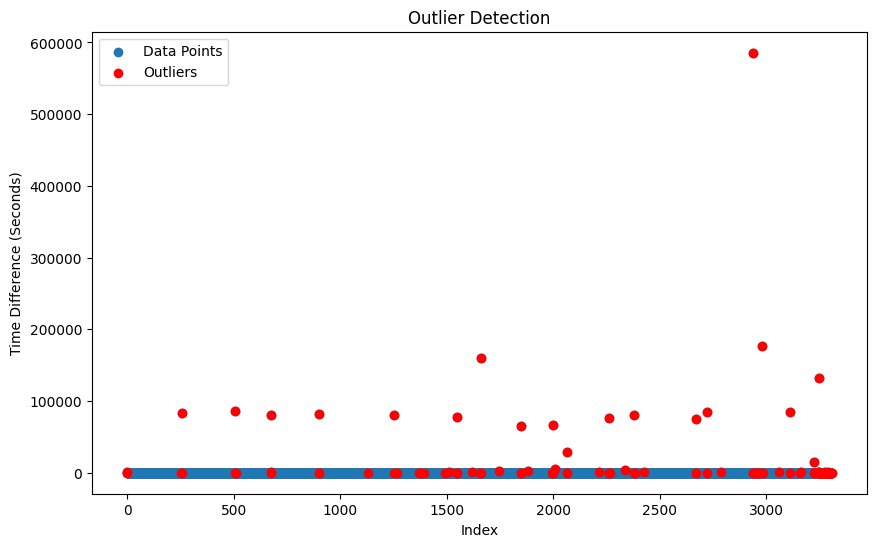

In [12]:
import matplotlib.pyplot as plt

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed.index, df_imputed['time_difference_seconds'], label='Data Points')

# Highlight outliers
outliers_indices = df_imputed.index[outliers == -1]
plt.scatter(outliers_indices, df_imputed.loc[outliers_indices, 'time_difference_seconds'], color='red', label='Outliers')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Time Difference (Seconds)')
plt.title('Outlier Detection')

# Add legend
plt.legend()

# Show plot
plt.show()


In [13]:
# Find the outlier with the biggest time difference
max_time_difference_outlier = df_imputed.loc[outliers_indices, 'time_difference_seconds'].idxmax()

# Retrieve the index and time difference of the outlier with the biggest time difference
max_time_difference_index = max_time_difference_outlier
max_time_difference = df_imputed.loc[max_time_difference_outlier, 'time_difference_seconds']

# Print or use the index and time difference of the outlier with the biggest time difference
print("Index of outlier with the biggest time difference:", max_time_difference_index)
print("Time difference of the outlier with the biggest time difference:", max_time_difference)


Index of outlier with the biggest time difference: 2939
Time difference of the outlier with the biggest time difference: 585593.0


In [17]:
# Locate the startdatetime of indices 2939 and 2938
startdatetime_2939 = df_sorted.loc[2939, 'startdatetime']
startdatetime_2938 = df_sorted.loc[2940, 'startdatetime']

# Print the startdatetime values
print("Startdatetime of index 2939:", startdatetime_2939)
print("Startdatetime of index 2940:", startdatetime_2938)
# This will print the time at which downtime of machine


Startdatetime of index 2939: 2023-05-26 21:14:40
Startdatetime of index 2940: 2023-05-26 21:17:35
